In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class Neural_Network():
    def __init__(self, neurons, Activations, initialization='randn',SEED=2000):
        """Define the NN design parameters
        Args:
            neurons (int array): list of numbers listing neurons for each layer
            Activations (str array): list of activations to be used for hidden and output layers
            initialization (str, optional): Choose weight initialization from
             uniform or normal distribution. Defaults to 'randn'.
        """
        
        self.inputSize = neurons[0] # Number of neurons in input layer
        self.outputSize = neurons[-1] # Number of neurons in output layer
        self.layers = len(neurons)
        self.weights = [] # weights for each layer
        self.biases = [] # biases in each layer 
        self.layer_activations = [] # activations in each layer
        self.SEED=SEED
        np.random.seed(SEED)
        
        if initialization == 'rand':
            self.initializer = np.random.rand
        elif initialization == 'randn':
            self.initializer = np.random.randn
        #elif initialization == "uniform":
            #self.initializer = np.random.uniform
        else:
            raise ValueError("initialization must be 'rand' or 'randn'")
        for i in range(len(neurons)-1):
            self.weights.append(self.initializer(neurons[i+1],neurons[i])) # weight matrix between layer i and layer i+1
            self.biases.append(self.initializer(neurons[i+1],1))
            self.layer_activations.append(Activations[i].lower()) # activations for each layer
        
            
    def sigmoid(self, z):
        """returns result of the sigmoid activation function on input z."""    
        #z=np.clip( z, -500, 500 )      #to avoid overflow 
        return 1.0/(1.0+np.exp(-z))
    
    def sigmoidPrime(self,z):
        """returns derivative of sigmoid activation function applied on input z."""
        return self.sigmoid(z)*(1-self.sigmoid(z))

                          
    def tanh(self, z):
        """returns result of the tanh sigmoid activation function on input z."""   
        z=np.clip( z, -100, 100 )      #to avoid overflow          
        return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    
    def tanhPrime(self,z):
        """returns derivative of hyperbolic tan activation function applied on input z."""
        return 1-self.tanh(z)**2

    def stanh(self,z):
        return z*self.tanh(z)

    def stanhPrime(self,z):
        return z*self.tanhPrime(z)+self.tanh(z)

  
                          
    def linear(self, z):
        """returns result of the linear activation function on input z."""  
        z=np.clip( z, -500, 500 )                                  
        return z
    
    def linearPrime(self,z):
        """returns derivative of linear activation function applied on input z."""                                                      
        return 1-(z==np.nan) #to broadcast 1 to same shape

    def ReLu(self,z):
        """returns result of the ReLU activation function on input z."""  
        z=np.clip( z, -100, 100 )                
        return np.maximum(z,0)
    
    def ReLuPrime(self,z):
        """returns derivative of ReLU activation function applied on input z."""
        return z>=0


    def aReLu(self,z,a=0.1):
        if a is None:
          raise Exception("Pass parameter 'a' along with aReLu(z,a)")
        z=np.clip( z, -100, 100 )
        return np.maximum(z,a*z)
    
    def aReLuPrime(self,z,a=0.1):
        if a is None:
          raise Exception("Pass parameter 'a' along with aReLu(z,a)")
        np.clip( z, -100, 100 )
        return a*(z<0)+(z>=0)  #returns a if z<0 else 1

    def exu(self,z,b=1.05,u=1.67):
        z=np.clip( z, -100, 100 )
        return (z>=0)*z*b+(z<0)*(b*u*(np.exp(z)-1))     
        
    def exuPrime(self,z,b=1.05,u=1.67):
        z=np.clip( z, -100, 100 )
        return (z>=0)*b+(z<0)*(b*u*np.exp(z))

    def softmax(self, z):
        """returns result of the softmax activation function on input z."""
        z=np.clip( z, -500, 500 )
        temp=np.exp(z)    #to avoid overflow it can be normalized using max(z)
        return temp/np.sum(temp,axis=0)   

    def softmaxPrime(self,z):
        #delta= lambda i,j: 1 if i==j else 0
        return self.softmax(z)*(1-self.softmax(z))


    
    #Function for different activation type
    def activate(self,z,activation):
        if activation=="sigmoid":
          return self.sigmoid(z)
        elif activation=="relu":
          return self.ReLu(z)
        elif activation=="tanh":
          return self.tanh(z)
        elif activation=="stanh":
          return self.stanh(z)
        elif activation=="arelu":
          return self.aReLu(z)
        elif activation=="exu":
          return self.exu(z)
        elif activation=="linear":
          return self.linear(z)
        elif activation=="softmax":
          return self.softmax(z)
        else:
          raise ValueError("Activation function not defined")

    #Function for prime calculation
    def activatePrime(self,z,activation):
        if activation=="sigmoid":
          return self.sigmoidPrime(z)
        elif activation=="relu":
          return self.ReLuPrime(z)
        elif activation=="tanh":
          return self.tanhPrime(z)
        elif activation=="stanh":
          return self.stanhPrime(z)
        elif activation=="arelu":
          return self.aReLuPrime(z)
        elif activation=="exu":
          return self.exuPrime(z)
        elif activation=="linear":
          return self.linearPrime(z)
        elif activation=="softmax":
          return self.softmaxPrime(z)
        else:
          raise ValueError("Activation function not defined")    


    

    
    def lossSE(self, predicted, actual):
        """Implementation of Squared-error loss function."""
        return np.mean(1/2*(predicted-actual)**2)
    
    #Question 2.c
    def lossCE(self, predicted, actual):
        """Implementation of Cross-Entropy loss function."""
        return -np.sum(np.multiply(actual, np.log(predicted)))/actual.shape[1]

    def lossBCE(self,z, actual):
        """Implementation of Cross-Entropy loss function."""
        return np.sum(np.maximum(z,0)-z*actual+np.log(1+np.exp(-np.abs(z))))/actual.shape[1]
    
    def forward(self, a):
        """Defines forward pass of the NN

        Args:
            a (array): input of size self.inputSize

        Returns: ???
        """
        #Implement forward pass  
        zs=[]   
        activations=[]   
        for w,b,activation in list(zip(self.weights,self.biases,self.layer_activations)):
          z=np.dot(w,a) + b
          zs.append(z)
          #print(activation)
          a=self.activate(z,activation)
          #if activation=="sigmoid":
          #a=self.sigmoid(z)
          activations.append(a)
        
        return activations[-1], zs,activations

        
                          
    def backward(self, x, y, zs, activations):
        """backward pass to calculate gradient of loss w.r.t. NN parameters

        Args:
            x (array): input
            y (array): ouputs from forward pass
            zs (list): layerwise intermediate outputs from forward pass
            activations (list): layerwise activations from forward pass

        Returns:
            [tuple]: gradients with respect to bias and weight parameters respectively
        """
        
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]
        n=zs[-1].shape[1]
        #Implement backpropagation 

        H=self.layers-2
        for l in range(H,-1,-1):
          prime=self.activatePrime(zs[l],self.layer_activations[l])
          delta_l=prime*np.dot(self.weights[l+1].T,delta_l) if l!=H else (activations[l]-y)*prime
          grad_b[l]=np.sum(delta_l,axis=1,keepdims=True) /n
          grad_w[l]=np.dot(delta_l,activations[l-1].T) /n if l!=0 else np.dot(delta_l,x.T) /n

        



        return (grad_b, grad_w)                 

    def update_parameters(self, grads, lr):
        """update the NN parameters using the gradients

        Args:
            grads (list): gradients obtained from backward pass
            lr (float): learning rate of NN
        """
        
        grad_b, grad_w = grads[0], grads[1]
        #print(len(grad_b),len(grad_w))
        #print(len(grad_b[0]),len(grad_w[0]))

        for i in range(len(self.weights)):
            #print(grad_b[i])
            self.weights[i] -=lr*grad_w[i] 
            self.biases[i] -= lr*grad_b[i]


    def error(self, X, Y, errors):  
        """Appends loss to error list"""
        if self.loss==self.lossBCE:
          y=np.squeeze(self.forward(X)[1][-1])  #passing z from last layer
        else:
          y = np.squeeze(self.forward(X)[0])

        #print(Y.shape,y.shape)
        #print(self.loss(y, Y),self.loss(y, Y).shape,"\n")
        errors.append(self.loss(y, Y))

    def copy_params(self):
        """Returns a copy of current NN parameters"""
        weights = [w.copy() for w in self.weights]
        biases = [b.copy() for b in self.biases]
        return (weights, biases)
                    
    def train(self, X, Y, lr = 1e-3, max_epochs = 1000, patience=5, batch_size = None,
              n_classes=10, onehotencoded=False, loss_func='SE', Xval=None, Yval=None, verbose=True, grad_show=False):
        """Function for training our Neural Network

        Args:
            X (ndarray): feature matrix of training data,
             Shape: (n,m) where n is no. of features and m is no. of samples.
            Y (ndarray): ground truth of training data, NOT one-hot-encoded. Shape: (1,m).
            lr (float or function, optional): constant learning rate or scheduler function.
             Defaults to 1e-3 constant lr.
            max_epochs (int, optional): epoch cap for training. Defaults to 1000.
            patience (int, optional): patience parameter for early stopping. Defaults to 5. Patients <= max_epochs
            batch_size (int, optional): mini-batch size. Defaults to full-batch GD if not provided.
            n_classes (int, optional): no. of classes for multi-class classification required if
            one-hot encoding is set to True. Defaults to 10.
            onehotencoded (bool, optional): Defaults to False.
            loss_func (str, optional): Choose from 'SE' and 'CE' loss functions. Defaults to 'SE'.
            Xval (ndarray, optional): Validation data feature matrix. Defaults to None.
            Yval (ndarray, optional): Validation data ground truth. Defaults to None.
            verbose (bool, optional): If True, displays logs and progress of training. Defaults to True.

        Returns:
            [list/tuple]: lists of train-set and validation-set losses seen over the traning process.
        """
        
        if onehotencoded:
            # a method for creating one hot encoded labels 
            def onehotencoding(Y, n):
                # one-hot encoding of class i is just the ith column of the identity 
                # matrix of size n where n is the total number of classes. so below 
                # code uses Y (a 1d array) for indexing into the identity matrix.
                return np.eye(n)[Y].T 

            Y = onehotencoding(Y, n_classes)
            if Yval is not None:
                Yval = onehotencoding(Yval, n_classes)

        # Below code ensures that Y is 2-dimensional even when one-hot encoding is not
        # performed, so our same code works for training NN for both tasks.  
        Y = np.expand_dims(Y,0) if len(Y.shape) == 1 else Y
        Yval = np.expand_dims(Yval,0) if (Yval is not None and len(Yval.shape) == 1) else Yval
        
        if loss_func == 'SE':
            self.loss = self.lossSE
        elif loss_func == 'CE':
            self.loss = self.lossCE
        elif loss_func=="BCE":
            self.loss = self.lossBCE
            
        train_errors=[]
        if Xval is not None:
            val_errors=[]
        i, j, v = 0, 0, np.inf
        best_params = self.copy_params()
        
        if batch_size is not None:
            if batch_size > len(X[0]):
                raise ValueError("invalid mini-batch size. Must be smaller than dataset length")
        else:
            batch_size = len(X[0])

        #LR control function

        if isinstance(lr, (float, int)):# constant Ir arg is passed to train get_ir lambda x: 1r # we return a function object which returns the same ir at every epoc elif callable(lr): # function in arg is passed to train
           get_lr =lambda X: lr # the function is then used to get in for a particular epoch else: raise ValueError('param Ir can only be a number or a scheduler function")
        elif callable(lr):
          get_lr =lr
        else:
          raise ValueError('param lr can only be a number or a scheduler function')

        
        gradient_w = np.zeros((self.layers-1, max_epochs)) 
        gradient_b = np.zeros((self.layers-1, max_epochs)) 
        RECALL=[]
        PRECISION=[]

        while j < patience:

            # Shuffle Dataset
            idx = np.arange(len(X[0]))
            np.random.shuffle(idx)
            X1 = np.take(X,idx,axis=-1) 
            Y1 = np.take(Y,idx,axis=-1)

            for q in range(0,len(X1[0]),batch_size):
                start, end = q, min(len(X1[0]), q+batch_size)
                train_x = X1[:, start:end] 
                train_y = Y1[:,start:end]
                out, dot_prod_z, activations_a = self.forward(train_x)
                grads = self.backward(train_x, train_y, dot_prod_z, activations_a) # find the gradients using backward pass

                for layer in range(self.layers-1):  #storing mean gradients
                  gradient_w[layer][i] = np.sqrt(np.mean(grads[0][layer]**2))
                  gradient_b[layer][i] = np.sqrt(np.mean(grads[0][layer]**2))

                self.update_parameters(grads, get_lr(i))
            i += 1 # increment epoch count

            self.error(X, Y, train_errors)
            if Xval is not None:
                self.error(Xval, Yval, val_errors)
                #print(v)
                #print(val_errors,"\n")
                #if v is not np.inf:
                  #print(type(v))
                  #if not isinstance(v,np.float64):
                    #v=sum(v)
                #print(val_errors,v)
                if val_errors[-1] < v:
                    j = 0 # reset patience counter
                    v = val_errors[-1] # update best loss
                    best_params = self.copy_params() # save params
                else:
                    j += 1 # increment patience counter
            
            if i%5 == 0:
              RECALL.append(self.recall(Xval,Yval))
              PRECISION.append(self.precision(Xval,Yval))
              if verbose:
                log = f"Epoch {i}..............Loss on train = {train_errors[-1]}"
                if Xval is not None:
                    log += f", Loss on val = {val_errors[-1]}"
                print(log)
                

                
            if i >= max_epochs:
                break # stop if epoch threshold crossed

        if Xval is not None:
            if i >= max_epochs and verbose:
                print("Reached Epoch Cap without convergence....Terminating")
            elif verbose:
                print("Early Stopping .............. Returning best weights")

            self.weights, self.biases = best_params # reset to best params
                    
        if verbose:
            x = np.arange(1, len(train_errors)+1)
            #print(train_errors[0].shape,len(train_errors))
            #print(train_errors)
            plt.figure(figsize=(10,10))
            plt.plot(x, train_errors, label="Loss on Train")
            if Xval is not None:
                plt.plot(x, val_errors, label="Loss on Val")
            plt.legend()
            plt.title(f"{loss_func} - Learning Rate = {lr}")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.show()
            print("\n") 

      

            if grad_show:

              fig, ax = plt.subplots(1, self.layers-1, figsize=(20, 8))

              for i in range(self.layers-1):
                  ax[i].plot(gradient_w[i])
                  ax[i].set_title(f"Gradient w.r.t. weights - layer {i+1}")
                  ax[i].set_xlabel("Epoch")
                  ax[i].set_ylabel("Gradient")
              plt.show()
              print("\n")
              fig, ax = plt.subplots(1, 1, figsize=(10, 10))

              for i in range(self.layers-1):
                  ax.plot(gradient_w[i], label=f"layer {i+1}")
              ax.set_title("Gradient w.r.t. weights ")
              ax.set_xlabel("Epoch")
              ax.set_ylabel("Gradient")
              ax.legend()
              plt.show()
              print("\n")


              fig, ax = plt.subplots(1, self.layers-1, figsize=(20, 8))

              for i in range(self.layers-1):
                  ax[i].plot(gradient_b[i])
                  ax[i].set_title(f"Gradient w.r.t. biases - layer {i+1}")
                  ax[i].set_xlabel("Epoch")
                  ax[i].set_ylabel("Gradient")
              plt.show()
              print("\n")

              fig, ax = plt.subplots(1, 1, figsize=(10, 10))

              for i in range(self.layers-1):
                  ax.plot(gradient_b[i], label=f"layer {i+1}")
              ax.set_title("Gradient w.r.t. biases")
              ax.set_xlabel("Epoch")
              ax.set_ylabel("Gradient")
              ax.legend()
              plt.show()
              print("\n")



        if Xval is not None:           
            return (train_errors, val_errors,np.array(RECALL), np.array(PRECISION))

  
        return train_errors
        
    def predict(self, x):
      temp=self.forward(x)[0]
      #temp=np.squeeze(temp)
      if self.outputSize==1:
        temp=np.squeeze(temp)
        pred_class=[0 if pred<0.5 else 1 for pred in temp]
      else:
        pred_class=np.argmax(temp.T,axis=1)
      return pred_class

    def recall(self, x, y):
      yhat=self.forward(x)[0]
      return np.sum(yhat==y)/np.sum(y==1)

    def precision(self, x, y):
      yhat=self.forward(x)[0]
      yhat=np.rint(yhat)
      return np.sum(yhat==y)/np.sum(yhat==1)

# Question 2.a

In [43]:
#reading into pandas dataframe
df=pd.read_csv("RestaurantReviews.csv",dtype="int")
df=df.iloc[:,1:]
df.dropna(inplace=True)
df

,back_try,not_good,i_have_to,about_place,portions,come_back,the_food,that_it_was,really_like,food_just,...,to_choose_from,will_definitely,IsRatingBad,IsRatingModerate,IsRatingGood,IsFoodGood,IsServiceGood,IsAmbianceGood,IsDealsGood,IsPriceGood
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
10802,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
10803,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
10804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0


In [44]:
#Numpy Array
RR=np.array(df)
RR, RR.shape

(array([[0, 0, 1, ..., 0, 0, 1],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 1]]), (10806, 676))

In [45]:
#X,Y can be obtained in this way
RR[:,:-5].shape,RR[:,-5:].shape

((10806, 671), (10806, 5))

# Question 2.b

In [46]:
def shuffle(arr):
  #np.random.seed(1000)
  np.random.shuffle(arr)
  n=arr.shape[0]
  id1=int(0.65*n)
  id2=int(0.2*n)
  id3=n-id1-id2
  return arr[0:id1,:], arr[id1:id2+id1,:], arr[id1+id2:id1+id2+id3,:]

S1,S2, S3=shuffle(RR)

S1.shape,S2.shape,S3.shape

((7023, 676), (2161, 676), (1622, 676))

# Question 2.c

I would use Sigmoid Activation in the last layer. Instead of probablity distribution, I will get the probability of the input for each class separately. So X might be on two classes or more too. It is a multilabel multiclass setting.

For the loss function, I will be using **crossentropy** function. It is implemented in NeuralNetwork class.

Sigmoid activation in last layer will give certain probabilities that inout belong to each class or not. And crossentropy loss in the end would measure the difference between the two.



```
def lossCE(self, predicted, actual):
        """Implementation of Cross-Entropy loss function."""
        return -np.sum(np.multiply(actual, np.log(predicted)))/actual.shape[1]
```



# Question 2.d

Backpropagation can be carried using derivative of sigmoid and passing it to the L-1 layers. $y^{'}-y$ will be there and it will be multiplied with SigmoidPrime and backpropagated.
Detail of derivation is shown in the notes.


```
n=input_size
delta_l=(activations[last_layer]-y)*sigmoidPrime
grad_b[last_layer]=np.sum(delta_l,axis=1,keepdims=True) /n
grad_w[last_layer]=np.dot(delta_l,activations[l-1].T) /n

```



![](https://raw.githubusercontent.com/bijayshah726/IE643/main/2d-1.jpeg)

![](https://raw.githubusercontent.com/bijayshah726/IE643/main/2d-2.jpeg)

![](https://raw.githubusercontent.com/bijayshah726/IE643/main/2d-3.jpeg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


Epoch 5..............Loss on train = 844.4818675554146, Loss on val = 857.3466052048077
Epoch 10..............Loss on train = 813.5375357221554, Loss on val = 826.8967432352863
Epoch 15..............Loss on train = 786.6378948708308, Loss on val = 799.6407840302934
Epoch 20..............Loss on train = 763.475767993399, Loss on val = 776.591204748649
Epoch 25..............Loss on train = 749.2127499593504, Loss on val = 762.5784188293329
Epoch 30..............Loss on train = 734.4674893570171, Loss on val = 748.440281118648
Epoch 35..............Loss on train = 714.2137244655955, Loss on val = 728.8901080099455
Epoch 40..............Loss on train = 699.7607219045547, Loss on val = 714.7188786310169
Epoch 45..............Loss on train = 689.6523995790897, Loss on val = 704.9192161646072
Epoch 50..............Loss on train = 678.74343909379, Loss on val = 694.5000125811156
Epoch 55..............Loss on train = 670.9486407042137, Loss on val = 687.1226463133149
Epoch 60..............Loss 

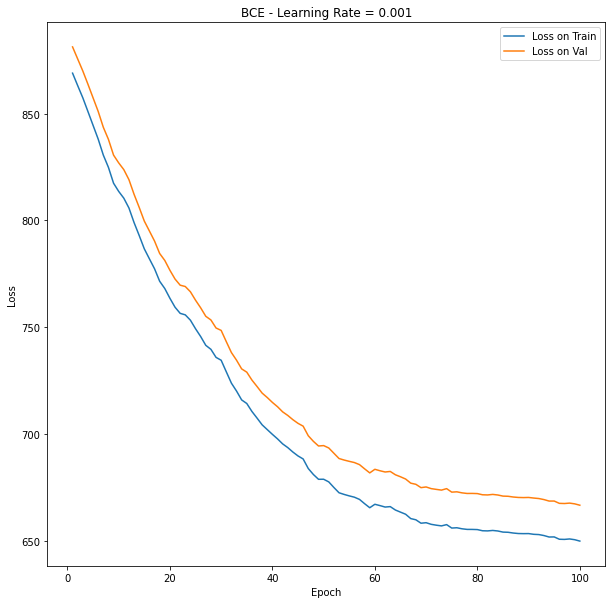

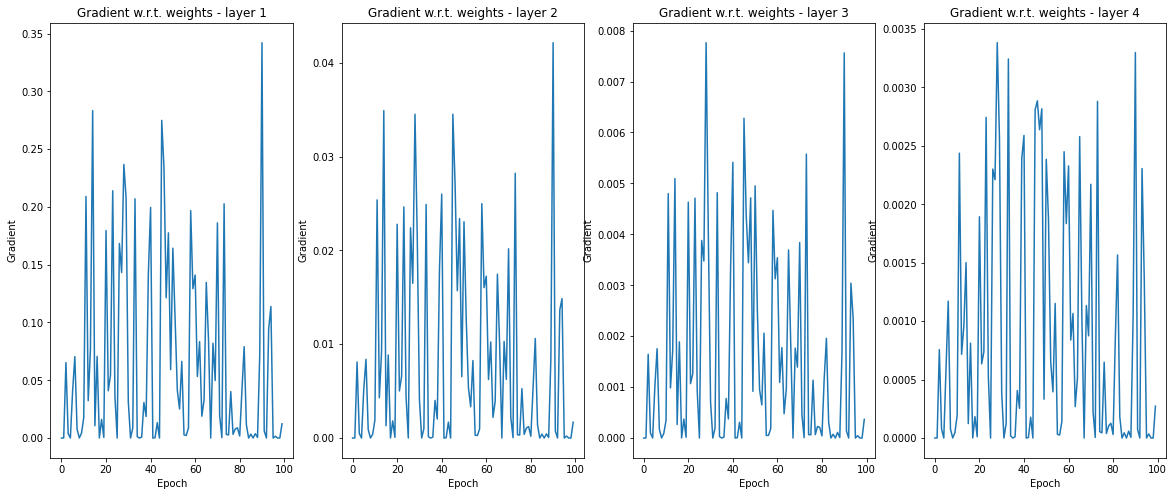

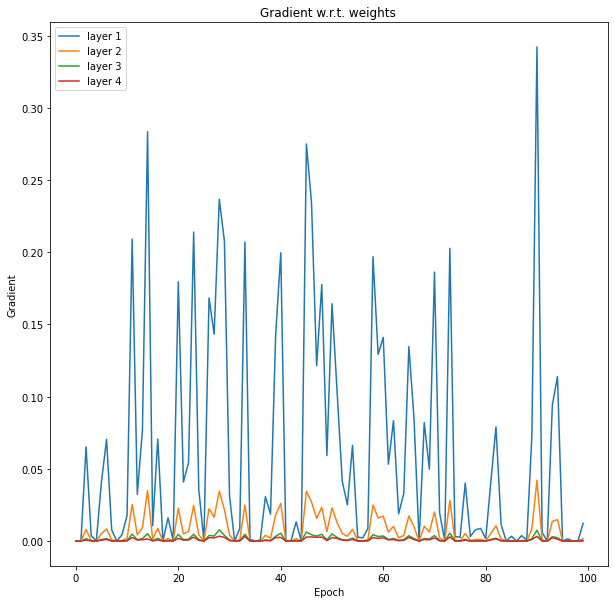

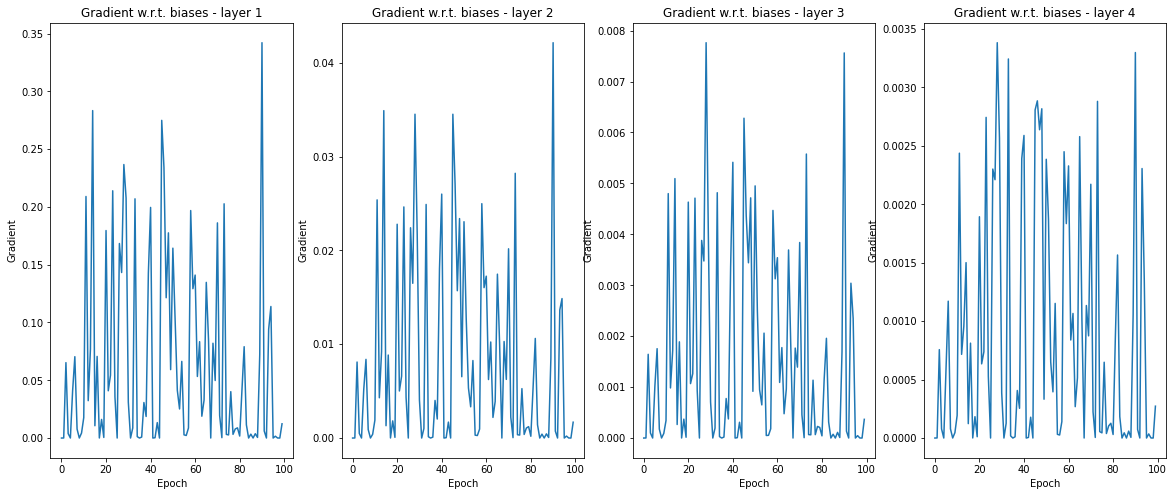

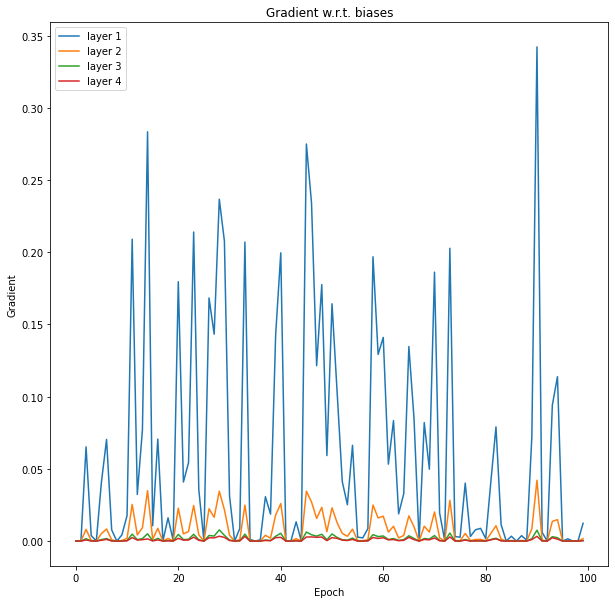

In [104]:

X_train=S1[:,:-5].T
Y_train=S1[:,-5:].T
X_val=S2[:,:-5].T
Y_val=S2[:,-5:].T

# Creating model instance


neurons = [X_train.shape[0], 200, 100, 50,5 ]
activation_functions = ['exu','exu','exu','sigmoid'] # activations in each layer (Note: the input layer does not have any activation)
nn_multiclass = Neural_Network(neurons, activation_functions,initialization='randn',SEED=21)
params=nn_multiclass.train(X_train, Y_train, patience=100,batch_size=200, lr=0.001, max_epochs=100, n_classes = Y_train.shape[0],
                             onehotencoded=False, loss_func='BCE', Xval = X_val, Yval = Y_val,verbose=True, grad_show=True)

# Question 2.e

Recall is also called as True Positive rate. It measures the sensitivity of model to predict the true positive value when compared to original case.

Recall = $\frac{TP}{TP+FN}$

Also, precision is measure of positive predictiveness of model. It denotes accuracy of positive label classification of model.

Precision = $\frac{TP}{TP+FP}$

### code implementation

In our case, both Recall and Precision would be equal based on the formula given.
```
    def recall(self, x, y):
      yhat=self.forward(x)[0]
      return np.sum(yhat==y)/np.sum(y==1)

    def precision(self, x, y):
      yhat=self.forward(x)[0]
      yhat=np.rint(yhat)
      return np.sum(yhat==y)/np.sum(yhat==1)
```
Above logic is applied in code.


In [105]:
def NN(LR=[0.1,0.01,0.001,0.0001,1e-5], BS=[5,10,20,30,40]):
  X_train=S1[:,:-5].T
  Y_train=S1[:,-5:].T
  X_val=S2[:,:-5].T
  Y_val=S2[:,-5:].T

  neurons = [X_train.shape[0], 200, 100, 50,5 ]
  activation_functions = ['exu','exu','exu','sigmoid'] 
  RECALL=[]
  LOSS=[]
  PRECISION=[]
  for lr in LR:
    for bs in BS:
      nn_multiclass = Neural_Network(neurons, activation_functions,initialization='randn',SEED=21)
      losses, l, r, p = nn_multiclass.train(X_train, Y_train, patience=100,batch_size=bs, lr=lr, max_epochs=200, n_classes = Y_train.shape[0],
                                  onehotencoded=False, loss_func='BCE', Xval = X_val, Yval = Y_val,verbose=False, grad_show=False)
      
      LOSS.append(l)
      RECALL.append(r)
      PRECISION.append(p)

  return LOSS, RECALL, PRECISION


In [106]:
LOSS, RECALL, PRECISION= NN()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


Epoch 5..............Loss on train = 1462.673069298054, Loss on val = 1501.472203898082
Epoch 10..............Loss on train = 1462.6730692433475, Loss on val = 1501.4722038367033
Epoch 15..............Loss on train = 1462.6730691886407, Loss on val = 1501.4722037753247
Epoch 20..............Loss on train = 1462.6730691339342, Loss on val = 1501.4722037139466
Epoch 25..............Loss on train = 1462.6730690792278, Loss on val = 1501.4722036525684
Epoch 30..............Loss on train = 1462.6730690245213, Loss on val = 1501.4722035911902
Epoch 35..............Loss on train = 1462.6730689698154, Loss on val = 1501.4722035298123
Epoch 40..............Loss on train = 1462.6730689151093, Loss on val = 1501.4722034684344
Epoch 45..............Loss on train = 1462.6730688604034, Loss on val = 1501.472203407057
Epoch 50..............Loss on train = 1462.6730688056978, Loss on val = 1501.4722033456792
Epoch 55..............Loss on train = 1462.673068750992, Loss on val = 1501.4722032843017
Epoc

KeyboardInterrupt: ignored

In [ ]:
def plot_fig(LR=[0.1,0.01,0.001,0.0001,1e-5], BS=[5,10,20,30,40]):
  fig, ax = plt.subplots(1,1,figsize=(10,10))
  EPOCHS=np.array(list(0,200,5))
  for i,lr in enumerate(LR):
    for j,bs in enumerate(BS):
      r=RECALL[i*len(BS)+j]
      ax.plot(EPOCHS,r,label=f"lr:{lr}, batch_size:{bs}")
  ax.set_title("Recall vs Epochs ")
  ax.set_xlabel("Epoch")
  ax.set_ylabel("Recall")
  ax.legends()
  plt.show()

